In [ ]:
!pip install uproot3
!pip install uproot_methods
!pip install mplhep
!pip install awkward

     |████████████████████████████████| 122kB 9.1MB/s 
     |████████████████████████████████| 92kB 6.5MB/s 
     |████████████████████████████████| 92kB 6.4MB/s 
     |████████████████████████████████| 5.5MB 7.3MB/s 


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import uproot3 as ROOT
import awkward as ak
import uproot_methods as upm
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep


In [ ]:
!ls drive/MyDrive/Event_Sample/BKG_Drellyan.root

drive/MyDrive/Event_Sample/BKG_Drellyan.root


In [ ]:
tree = ROOT.open("/content/drive/MyDrive/Event_Sample/BKG_Drellyan.root")["Delphes"]

In [ ]:
# 젠 레벨에서의 pt pid status를 따옵니다.
# 어레이로 받아주는 방법은 다음과 같습니다. 다른 방법을 활용해도 좋습니다.
# e.g. x = tree.array("Particle.PT")

pt = tree["Particle.PT"].array()
pid = tree["Particle.PID"].array()
status = tree["Particle.Status"].array()

In [ ]:
# 볼까요?
# 구조는 [[] [] [] ... [] [] []] 같이 생겼습니다. 어레이 안에 어레이가 있습니다.
# 각 내부 어레이는 하나의 이벤트를 의미합니다.

print(pt)
print(pid)
print(status)

[[0.0 0.0 12.149044 ... 0.15879026 0.14823811 0.051475085] [0.0 0.0 9.876939 ... 0.06706651 0.18385379 0.24764884] [0.0 0.0 7.3751583 ... 0.02479093 0.6794866 0.090890765] ... [0.0 12.390335 0.0 ... 0.31962484 4.1192417 1.1827693] [0.0 0.0 5.463041 ... 0.20479222 0.66665006 0.18559365] [0.0 0.0 2.3429263 ... 0.30875343 1.3786601 0.14321242]]
[[21 2 -2 ... -211 -2212 211] [-3 21 1 ... -211 22 22] [2 21 21 ... 111 -2112 111] ... [21 21 2 ... -211 211 -211] [21 2 21 ... -211 2112 111] [1 21 21 ... 111 -2112 111]]
[[21 21 43 ... 1 1 1] [21 21 43 ... 1 1 1] [21 21 43 ... 1 1 1] ... [21 43 21 ... 1 1 1] [21 21 43 ... 1 1 1] [21 21 43 ... 1 1 1]]


In [ ]:
# 마스크는 조건식입니다.
# 마스크는 다음과 같이 조건, and, or 연산자로 구성할 수 있습니다.
# 아래의 조건은 pid가 플마11이고 status가 1인 최종상태 전자 골라내기 마스크와
# pid가 플마 13이고 status가 1인 최종상태 뮤온 골라내기 마스크입니다.

e_mask = ((pid == 11) & (status == 1)) | ((pid == -11) & (status == 1))
u_mask = ((pid == 13) & (status == 1)) | ((pid == -13) & (status == 1))

In [ ]:
# 이와 같은 배열을 불린 어레이라고 합니다.
# 불린 어레이는 정수형 자료형이고 0과 1로 구성되어있습니다. 0 = False, 1 = True

print(e_mask)
print(u_mask)

[[False False False ... False False False] [False False False ... False False False] [False False False ... False False False] ... [False False False ... False False False] [False False False ... False False False] [False False False ... False False False]]
[[False False False ... False False False] [False False False ... False False False] [False False False ... False False False] ... [False False False ... False False False] [False False False ... False False False] [False False False ... False False False]]


In [ ]:
# 우리가 그리고자 하는 물리량에 마스크를 씌워 평평하게 해줍니다.
# 평평하게 안하면? 어떻게될까?

elec_pt = pt[e_mask].flatten()
muon_pt = pt[u_mask].flatten()

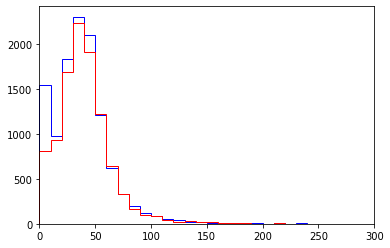

In [ ]:
## 뽑아온 친구들로 전자와 뮤온의 횡단 운동량의 히스토그람을 작성합시다.

plt.hist(elec_pt,bins=30,range=(0,300),color='blue',histtype='step')
plt.hist(muon_pt,bins=30,range=(0,300),color='red',histtype='step')
plt.xlim(0,300)
plt.show()

In [ ]:
## HOMEWORK
# Q1. 최종상태의 전자와 뮤온의 방위각 분포를 각각 히스토그램으로 그려보세요.
# hint : Particle.Phi 를 이용하세요.




In [ ]:
# Q2. APPENDIX 를 참고해서 광자 혹은 Z 보존의 질량 분포를 히스토그램으로 그려보세요.
# hint1 : Particel.PID, Particle.M 을 활용하세요.
# hint2 : Particle.Status 는 이용하지 마세요.




In [ ]:
## APPENDIX ##

## STANDARD MODEL PID NUMBERING SCHEME
#
#  QUARKS         ANTIQUARKS
#  d = 1	  d~ = -1
#  u = 2	  u~ = -2
#  s = 3	  s~ = -3
#  c = 4	  c~ = -4
#  b = 5	  b~ = -5
#  t = 6	  t~ = -6
#
#  LEPTONS        ANTILEPTONS
#  e-  = 11	  e+  = -11
#  ve  = 12	  ve~ = -12
#  mu- = 13	  mu+ = -13
#  vu  = 14	  vu~ = -14
#  ta- = 15	  ta+ = -15
#  vt  = 16	  vt~ = -16
#
#  BOSONS
#  g  =  21
#  a  =  22
#  z  =  23
#  w+ =  24
#  w- = -24
#
## END OF TABLE 